(1001, 6) (6, 1001)
(1001, 6) (6, 1001)


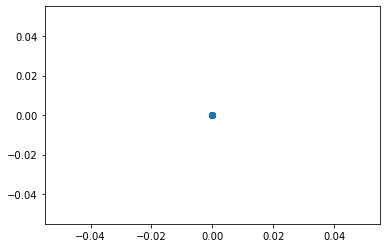

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[141]:


#!/usr/bin/env python
# coding: utf-8
from __future__ import print_function




import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import quadrotor
import math



robot = quadrotor.Quadrotor()
horizon_length = 1000
N = 1000
u_ = robot.mass*robot.g/2
z0 = np.array([1,0,0,0,0,0]).reshape([6,])
u0 = u_ * np.ones([2,1])
o = (2*math.pi/10)
r = 1
T = 10


x_desired = [0 for i in range(0,N+1)]
y_desired = [0 for i in range(0,N+1)]
vx_desired = [0 for i in range(0,N+1)]
vy_desired = [0 for i in range(0,N+1)]
theta_desried = [0 for i in range(0,N+1)]
omega_desried = [0 for i in range(0,N+1)]

# v = 1/10
# v= v
# x_desired = [v*i*T/(N) for i in range(0,N+1)]
# y_desired = [v*i*T/(N) for i in range(0,N+1)]
# vx_desired = [v for i in range(0,N+1)]
# vy_desired = [v for i in range(0,N+1)]
# theta_desried = [0 for i in range(0,N+1)]
# omega_desried = [0 for i in range(0,N+1)]



state_desired = np.array([x_desired,vx_desired,y_desired,vy_desired,theta_desried,omega_desried])
ref_traj = state_desired.T
print(ref_traj.shape,state_desired.shape)



z0 = np.zeros_like(state_desired[:,0])
u_init = [(robot.mass * robot.g / 2) * np.ones([2]) for _ in range(horizon_length)]
print(ref_traj.shape,state_desired.shape)

plt.figure()
plt.scatter(x_desired,y_desired)

plt.show()



# In[142]:


In [2]:




A, B = robot.get_linearization(np.zeros(6),u0,0) 
A, B

(array([[ 1.    ,  0.01  ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  1.    ,  0.    ,  0.    , -0.0981,  0.    ],
        [ 0.    ,  0.    ,  1.    ,  0.01  ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.01  ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ]]),
 array([[ 0.   ,  0.   ],
        [-0.   , -0.   ],
        [ 0.   ,  0.   ],
        [ 0.02 ,  0.02 ],
        [ 0.   ,  0.   ],
        [ 0.015, -0.015]]))

In [3]:
Q = np.diag([1, 1, 1, 1, 1, 1])
R = np.diag([0.01, 0.01])
P_last = Q


while True:
    Pnew = Q + A.transpose().dot(P_last).dot(A) - A.transpose().dot(P_last).dot(B).dot(np.linalg.inv(B.transpose().dot(P_last).dot(B)+R)).dot(B.transpose().dot(P_last).dot(A))
    err = Pnew.reshape(-1) - P_last.reshape(-1)
    err = np.sum(err @ err.T)
    if err < 0.00011:
        break
    else:
        P_last = Pnew

K = -np.identity(2).dot(np.linalg.inv(B.transpose().dot(P_last).dot(B)+R)).dot(B.transpose().dot(P_last).dot(A))

In [4]:
%%time

def lqr_controller(state,i):
    ut = K.dot(state) + u_init[0]
    return ut.T
t, state, u = robot.simulate(z0,lqr_controller, horizon_length, disturbance = True)



Wall time: 23 ms


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAARRdtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA2+ZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAOSq/2+9Zj+im+AAABXQArISJA0agX3rQrxAFVDm
jgk//Zy6/Zkysf1BBlzSMecs0adU4czxdWu3ATn6Hlfa1lvTJVwFeJzzgStuUpMltOrgd3xiXeRy
NijQbA3SBfm/fv33UGxcJxjDaZrIZWJfsESDGQ+3B//+mxNP94N7yss6aV0xf5e1Y3eMSRhlnOEg
5t6laqwn4ehgEZ2RN/0//u4oRdcLZiHU1WyaHTtereEHbjvfPBTFNygr8URVeaLIHKnoz7eFX5dJ
5BLMgkwG6DYtoE/yA/qBva+1HG9dLso+HX9qz9vPI75MahHUu6vK+1J58JMjWbYnI//bZrrAAA5m
+lNSqA7Y3Jz+cejY/yaAwuX1ba/gNpuUACHjQpctA6IwDR5NeFI1TjyFjAhWgUzyDeXFDtYkkil8
a6gWSH4zzOgO9oNVUUPhXGl9rI0GTKS/4UstkFTsHnaBigcDRPYCQGQbf4Uimk4BYb53zk6N77Mv
SUvr5bWpZXoO6GuCbY9fOGtm/83l2O1ZLSp8bISiv+W/mKQh3mkn3Hk/FzyfVfSocPF0cFEubbJc
frv/HsbvVXJOgFLnzNK5SYIkQy/DrsF94ZHlct+UaXRpPEHEQSQW+ASyfTw7//dZc8yBI9mFwuhH
wKvyWzSkYF71BFzCcMXuQUExQWFsf8gWapbV4ksND5fLVEHR/Nd6r4CyqEbkCIf7E2z0V/Tbcaiy
HbwEF1K6Fd1p7J9Af9lQTsYOAjfRlxtM7n3KFGd5WK4vrnLz7+WugAAFiES1lw0DwCJICDJIIBiC
AuxFYjioXfFoq5mlW+6est0s6DDTwzE+UWupyGTX9kIebsIVLPwNQ/4SETuvVOI0dQeS4BxhlX5m
v0vM2JtNBWMcVjE3wq+M8sxN8jEPfltU5O78OOlBRen/62j5bYb1oenPXqNr/+8EytCoe5NxK9G9
gCnL1NKNb45n5SFDrRxPDpCIwWInoRkt2oBQ+BnAiODhji7EGubsLOiEGGdyNFtI+2GTX49YKUIS
M0dO58OYGOSfwjlZfauygjBWmdqz8D3+IYgMjufbx6014qSBcp5MhefT5f95+IfJyM6Sw3wLs/re
yrY5WFC29CD7XKUaKzI/QBju10SusA35BnVBh5igu3RnQjp+kj/9E/DhtFGQAAIYqHWUFh50MWCH
5Fjok4TWB/kh1AqDsfqKPYnr+8wXdjhPhUsSXMIVPyeas6cseJxZMhT8ZHhTjDyJUzT//uU418U8
BijNqHuXYZKG9sMvuYX9VbR+wbfz32rwUJG3HEMgATDMigPr86VbgM9iRNWr2nEwl3MJkTvZ88j4
fGT3Q4tRegANSf/nyFwa3pPUM8cLo+NY/YLEfQ+zpYSgCMssJOnjwVxXmsY1jv0lbELakyi4Q8Za
L6hHZXuUswYjd4PsUDXAHlyJJ+zojQM3hQUtoGrMc1lroNfGkA5uAjB8z+MvvZdbJJVLuqRPd5/j
7zr2nlzHdoGaZ8kjcaxsNWbIlA0nqHFMquytvyg8rmq4MuGkbwSyY+FhAAADAAADAQhN2LtIS1es
tJWNELko3YJB1AUqCyiIMN4s4aQ222SrwcW0vuti1rP/1NAdHegyt3zt+wkGDI7KAS8HBS/GYo/i
SXt9UDCxFdnNk8QGiX26lt26gNQ2/ydUxkRuxe5zMV2LhkQXMbScd/Z/xBl3wYxHp2u79SXCxRdD
EmmVBw6xMzMv80fcDAxkO1IhU9hJ7SzeadGez4i+f5FCbGkcD267ewEgze78x8hMrvlUL4v3saZ0
ej6SN6bzjfsOVbDz2CU7M2+/pwR9cQjz24i2YIK3QMNvE6CBI7LQBiF/YaQcEpjERB6Bnrh0VJt7
wIohDB15GeBerO+PRzMBo8RQPVcoKagJOVpAZA/SvWJNHLU17OgXrzjhZxbK6b4be4y5Rnojd5OE
MqMlKLCsglHHtTUF68OzasuQ6FeypiAAAxpFg/njbPKciBt4hgg0NFxtUSDzgnZVkLPIWXm/++yR
jmoN99Ra1ko+507FkxF81GjO1I5oUtg8xirnWxILZ9oxBJ5wV4ryvfBE3gdRSwH+FIhveZz09e6d
moW7YJ7lM26Js9DW+YcegjbIliY1c6A5mVqxibmNG2OORh2MpNt5cEEfBshnGQ/f7j5esqvviJ+z
PG7ye0i+LYhZe5P6hRkKc/6uPN3gABI067hw/l4AAAV3Tfg+3+wxuucZSdcqpKuftqfZf/bAoiYG
QIVrjnugsLZjmqcVw4YfEeEj1oCDu7KTbWGLreb24m63dvAUC5kRq6d34Lqr+9LyTYwPgQ5Iz1OR
ql6nyJUq0eIhsmaK9VyiX6RDFrpF1zNN3V+c3c5ERWhZO9YtbVfLExvh+GNZ05EMZU//9BXo+pTb
UeONvG9f1wtUD4/983Ga2f/QsLb07K/oWB2NRbd3RJJ3pUuOZhSFP/11ozjuJvvQOO0OkwoN02Cq
fOb7bV6a5OUObTFnUTrhd1wEQdiUZQKWjxdPe4tg7tEQFfkl5MUwhQO3xhwvP0piEqH8W+f6Gy58
cAAC1doooAAAjd7fX2Sc/Wun98DKbUC11VRb0/20jfZelHEbiDq3xQakNS++ucwEFzTbe2+wUsBR
M0R7leUiN+mijJw1yphl5nOynS78M45PTT0og9zlcN5gblz0fmaubNqHCDoQw5lQGHm5swVAKk0b
MnvMoEUu0HvBt4hghHV5iWXoVJ2H7wKX4vOY/8iV6vTEqsqvcDlvOQ91QN5DOR0QX1xfD0nj0mi6
w89rlmYZg7AfC3CFbmxo2idwZD+vZA2HNj5ywcchpTJpNpG6/ROYWiuEWzYRTv8McfhUHGWXbGLZ
axaKMK5zALz412FpgAAAB

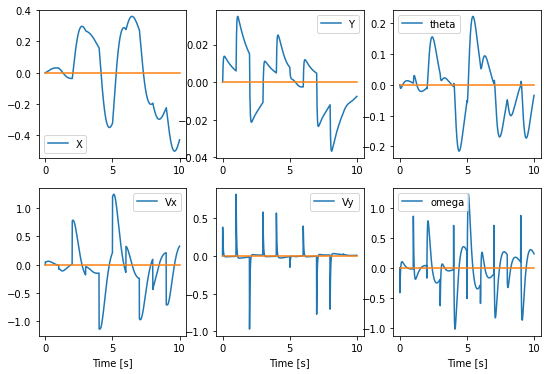

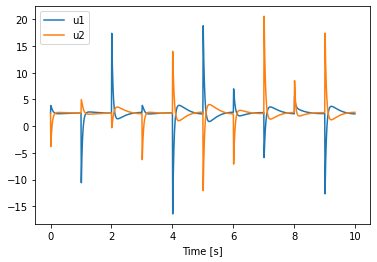

In [5]:

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_desired[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_desired[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_desired[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_desired[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_desired[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_desired[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
robot.animate_robot(state,u)